In [ ]:
import os

In [ ]:
from supplyseer.bayesian.bayesian_eoq import bayesian_eoq_full
from supplyseer.eoq import eoq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Economic Order Quantity (EOQ) Model and why it is outdated

d = annual demand <br>
q = ordered demand quantity <br>
a = fixed ordering cost <br>
h = warehousing charge per year unit of inventory <br>
p = sale price per unit <br>

EOQ = sqrt(2da / h)

In [39]:
d = 12000 # demand, assumin 1000 units per month
a = 500 # order cost, assuming $500 per order (including administrative and transportation costs)
h = 10 # holding cost per unit per year, assuming $10 per unit per year (storage, insurance and other costs)

In [5]:
economic_order_q = eoq(d, a, h)
economic_order_q

1095.4451150103323

In [6]:
economic_order_q / d * 365 # Tells us to order every 33 days

33.31978891489761

In [7]:
d / economic_order_q    # Tells us to order almost 11 times a year

10.954451150103322

### What is the issue?

1. Constant demand
2. Fixed lead time
3. Replenishment (restocking) occurs immediately without delays
4. No stock-outs or shortages

### Assume dynamic demand, order cost, and inventory cost and do Bayesian computation

Our new assumptions will be the following:
- Random and unknown demand
- Random and unknown order cost
- Random and unknown inventory cost
- Economic Order Quantity has a distribution <br>
<br>
So instead of knowing a fixed value we can state a range of values to help us understand the combinations. <br>
How? We will define a range of 100 values for each of the variables. And then we'll produce a 100x100x100 combinatorial space <br>
where we compute all of the possible combinations of the demand, order cost, and the inventory cost. <br>
After that, we do Bayesian computation of the most probable EOQ and its 95% credible interval. <br>
<br>
<br>
That will tell us two things:
1. If we believe the variables to have some defined value, it will compute all possibilities from the stated range of values and give the most probable EOQ <br>
2. Given the defined values and the stated range of values, we will also be able to see how certain the outcome is with 95% probability!

In [40]:
# We'll go through this function in more detail in the next section

eoq_dis = bayesian_eoq_full(d, a, h, 
                            min_d=10000, max_d=14000, 
                            min_a=300, max_a=700, 
                            min_h=5, max_h=15, 
                            initial_d=12500, initial_a=400, initial_h=10, 
                            n_param_values=100)



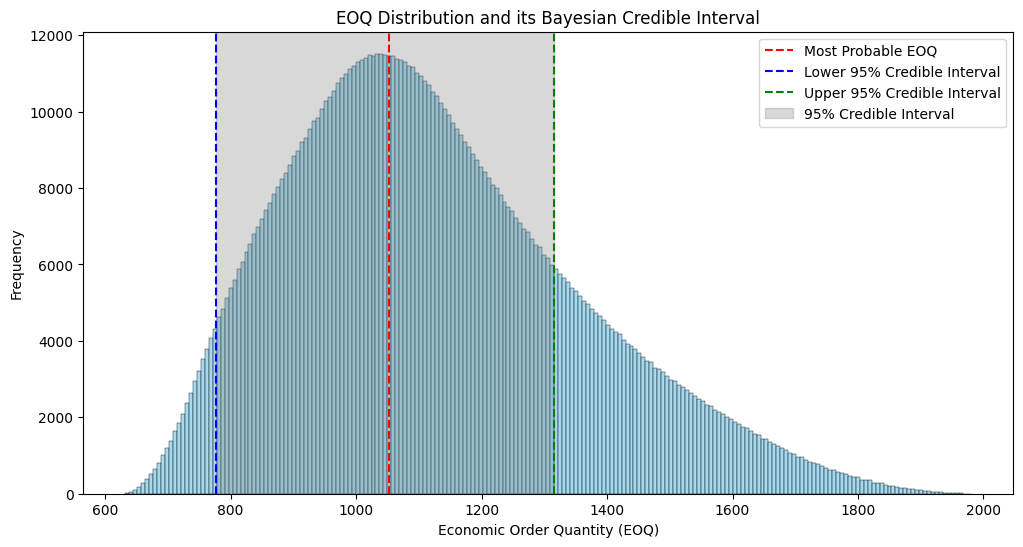

In [41]:
def plot_eoq(input_eoq):
    # Plot the histogram of the EOQ distribution
    sns.histplot(input_eoq["eoq_distribution"], kde=False, color='skyblue', edgecolor='black')
    
    # Plot the most probable EOQ as a vertical line
    plt.axvline(x=input_eoq["bayesian_eoq_most_probable"]["eoq"], color='red', linestyle='--', label="Most Probable EOQ")
    
    # Get the lower and upper bounds of the credible interval
    lower_ci = min(input_eoq['eoq_credible_interval'])
    upper_ci = max(input_eoq['eoq_credible_interval'])
    
    # Plot the lower and upper bounds as vertical lines
    plt.axvline(x=lower_ci, color='blue', linestyle='--', label="Lower 95% Credible Interval")
    plt.axvline(x=upper_ci, color='green', linestyle='--', label="Upper 95% Credible Interval")
    
    # Fill the area between the lower and upper credible intervals
    plt.axvspan(lower_ci, upper_ci, alpha=0.3, color='grey', label='95% Credible Interval')
    
    # Add labels and title
    plt.xlabel('Economic Order Quantity (EOQ)')
    plt.ylabel('Frequency')
    plt.title('EOQ Distribution and its Bayesian Credible Interval')
    
    # Show legend
    plt.legend()
    
plt.figure(figsize=(12, 6))
plot_eoq(eoq_dis)

#### What is the function doing?

```
bayesian_eoq_full(
                d, a, h, 
                min_d=8000, max_d=14000, 
                min_a=300, max_a=800, 
                min_h=5, max_h=15, 
                initial_d=12500, initial_a=550, initial_h=12, 
                n_param_values=100
                )
```


`d = demand` <br>
`a = order cost` <br>
`h = holding cost` <br>
`min_d = lowest demand you expect or know from experience or prior data` <br>
`max_d = highest demand you expect or know from experience or prior data` <br>
`min_a = lowest order cost you expect or know from experience or prior data` <br>
`max_a = highest order cost you expect or know from experience or prior data` <br>
`min_h = smallest holding cost you expect or know from experience or prior data` <br>
`max_h = highest holding cost you expect or know from experience or prior data` <br>
`initial_d = your initial belief/guess/knowledge of what the demand is` <br>
`initial_a = your initial belief/guess/knowledge of what the order cost is` <br>
`initial_h = your initial belief/guess/knowledge of what the holding cost is` <br>
`n_param_values = the number of variable values to use in the range of min and max` <br>
<br>
<br>

The simpler translation is the following, <br>
<br>
You know the average demand, order cost and holding cost so you set them in `d`, `a`, and `h`. <br>
But, you know from prior data, experience or you expect them to be between a range of values, e.g <br>
you know that demand is between X and K so you set `min_d` and `max_d` accordingly. Likewise for the others <br>
where you set their range as well. Now, you have the averages and the range of values but your analysis or <br>
experience shows that the demand should be D, so you set `initial_d` to that. Likewise for the others. <br>
The last one is `n_param_values` which just defines how many values in your range you want to use for <br>
computing the EOQ. Basically how many values in your range you want to test.

In [93]:
d = 16000 # the annual demand of your product in units
a = 600 + 20 # the cost of placing an order, including administrative and transportation costs, in dollars, assume $600 transport and $20 admin
h = 15 # the holding cost per unit per year, in dollars, assume $15 per unit per year

min_d, max_d = 10000, 24000 # the demand range during a year in units
min_a, max_a = 260, 1200 # the order cost range in dollars
min_h, max_h = 5, 45 # the holding cost range in dollars

initial_d = 18000 # 18 000 the initial demand value, from your demand forecast
initial_a = 800 # 800 the initial order cost value based on your transportation bills and administrative costs
initial_h = 20 # 20 the initial holding cost value based on your storage, insurance, and other costs from your accounting department

n_param_values = 150 # you want to evaluate 150 different values from each of your demand, order cost, and holding cost ranges

In [94]:
eoq_dis = bayesian_eoq_full(d, a, h, 
                            min_d=min_d, max_d=max_d, 
                            min_a=min_a, max_a=max_a, 
                            min_h=min_h, max_h=max_h, 
                            initial_d=initial_d, initial_a=initial_a, initial_h=initial_h, 
                            n_param_values=n_param_values)


### Surprise, surprise!

Even if the full distribution of your 150x150x150 (3 375 000) different evaluated values concentrates <br>
around EOQ=800 that is not the most probable value given the EOQ formula and your initial guess. <br>
<br>
<br>

You see the interval which is showing a completely different view. The interval is based on your `n_param_values` <br>
where you evaluate 150 values from the demand range, 150 values from the order cost range, and 150 values from the holding cost range. <br>
<br>
*But*, as you can see, you have a combinatorial parameter space of 3 375 000 values to evaluate but the most likely parameters are the ones <br>
you got from the Bayesian computation of your demand, order cost, and holding cost. Which just means that you gave a range of possible values for <br>
your values and your initial guess, after computation the most likely values from the range you gave is fed into the EOQ formula. <br>
<br>
<br>
Finally, the EOQ formula takes your most likely values given the range and initial guess and produces the most probable EOQ together <br>
with its 95% credible interval which can be interpreted as the 95% probability that your EOQ will be contained in this range.

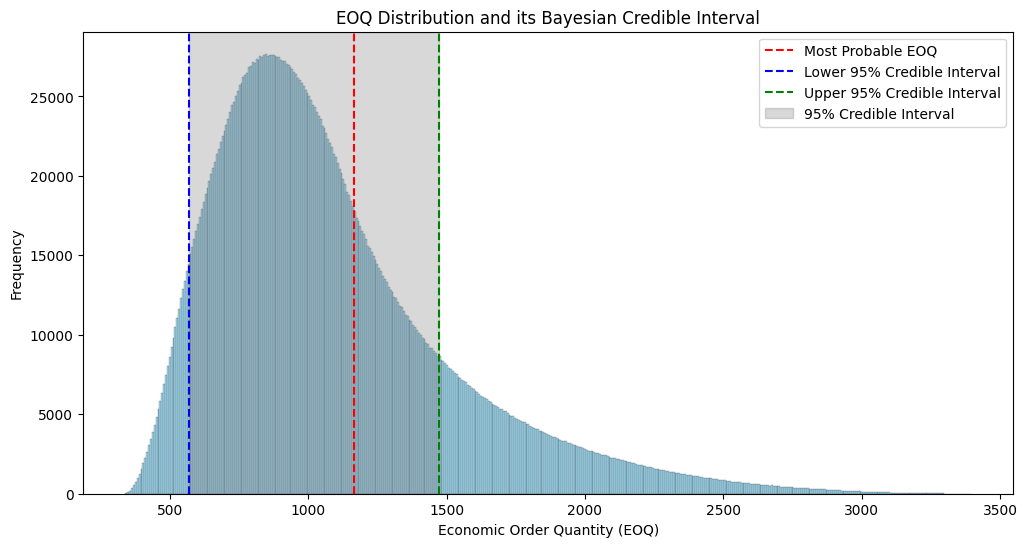

In [95]:
plt.figure(figsize=(12, 6))
plot_eoq(eoq_dis)

#### The most probable EOQ value and its order frequency

In [98]:
eoq_dis["bayesian_eoq_most_probable"]

{'eoq': 1167.2367250850807,
 'd': 16953.020134228187,
 'a': 707.9194630872483,
 'h': 17.61744966442953}

In [99]:
order_every_n_days = eoq_dis["bayesian_eoq_most_probable"]["eoq"] / d * 365
order_n_times_a_year = d / eoq_dis["bayesian_eoq_most_probable"]["eoq"]

print(f"We need to order every {order_every_n_days:.1f} days which is {order_n_times_a_year:.1f} times a year.")
print(f"Order quantity: {eoq_dis['bayesian_eoq_most_probable']['eoq']:.1f} units every {order_every_n_days:.0f} days.")

We need to order every 26.6 days which is 13.7 times a year.
Order quantity: 1167.2 units every 27 days.
